# Module - 2 

# Visualization

In [19]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
data = p.read_csv('demo1.csv')

In [22]:
df = data.dropna()

In [23]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['magType','status', 'locationSource']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)

In [24]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2,2021-08-08T02:41:28.900Z,35.943667,-117.728167,0.42,0.56,1,10.0,106.0,0.063260,0.16,...,2021-08-08T02:44:57.423Z,"16km E of Little Lake, CA",earthquake,0.35,1.41,0.122,4.0,0,0,ci
5,2021-08-08T02:13:55.060Z,35.776833,-117.586667,7.88,1.04,1,17.0,129.0,0.039810,0.17,...,2021-08-08T02:17:31.376Z,"16km W of Searles Valley, CA",earthquake,0.38,0.77,0.156,12.0,0,0,ci
7,2021-08-08T01:57:36.060Z,33.680500,-116.730500,14.30,0.80,1,32.0,50.0,0.033480,0.15,...,2021-08-08T02:01:09.832Z,"7km S of Idyllwild, CA",earthquake,0.28,0.39,0.117,20.0,0,0,ci
10,2021-08-08T01:49:10.870Z,33.154000,-116.389167,-0.17,0.60,1,14.0,189.0,0.384600,0.26,...,2021-08-08T01:52:50.681Z,"11km S of Borrego Springs, CA",earthquake,1.84,31.61,0.205,3.0,0,0,ci
12,2021-08-08T01:34:18.050Z,38.764332,-122.710671,1.56,0.86,0,10.0,116.0,0.009697,0.04,...,2021-08-08T01:35:55.520Z,"2km SW of Anderson Springs, CA",earthquake,0.44,0.30,0.160,4.0,0,2,nc


In [25]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

Text(0.5, 1.0, 'gap & depth')

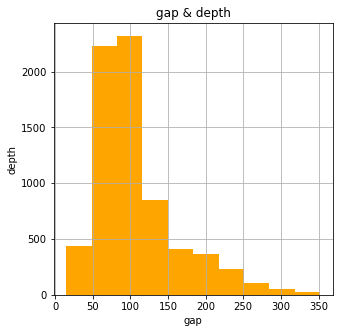

In [26]:
df['gap'].hist(figsize=(5,5), color='orange', alpha=1)
plt.xlabel('gap')
plt.ylabel('depth')
plt.title('gap & depth')

Text(0.5, 1.0, 'magError & depthError')

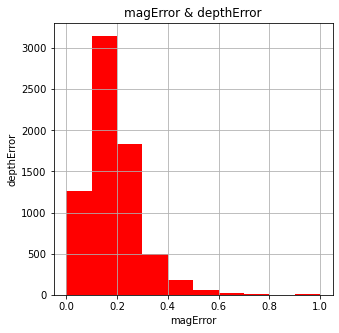

In [27]:
df['magError'].hist(figsize=(5,5), color='r', alpha=1)
plt.xlabel('magError')
plt.ylabel('depthError')
plt.title('magError & depthError')

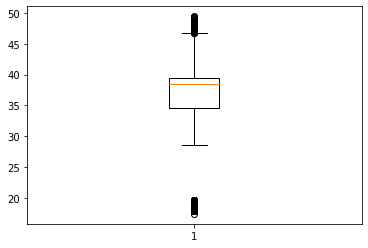

In [28]:
plt.boxplot(df['latitude'])
plt.show()

<AxesSubplot:xlabel='latitude'>

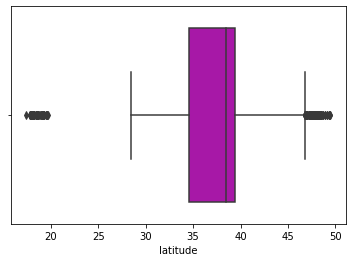

In [29]:
import seaborn as s
s.boxplot(df['latitude'], color='m')

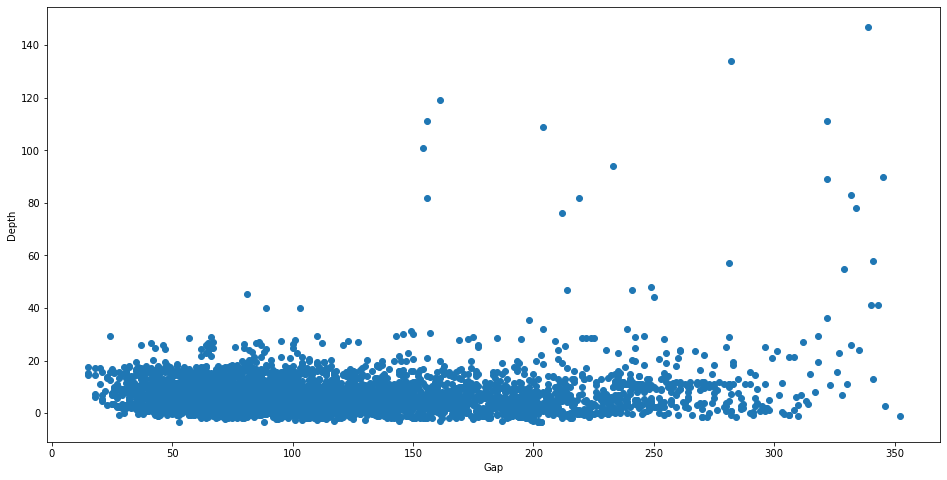

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['gap'],df['depth'])
ax.set_xlabel('Gap')
ax.set_ylabel('Depth')
plt.show()

9.0      5.99
10.0     5.88
8.0      5.88
7.0      5.40
12.0     5.27
         ... 
148.0    0.01
100.0    0.01
161.0    0.01
82.0     0.01
95.0     0.01
Name: nst, Length: 92, dtype: float64

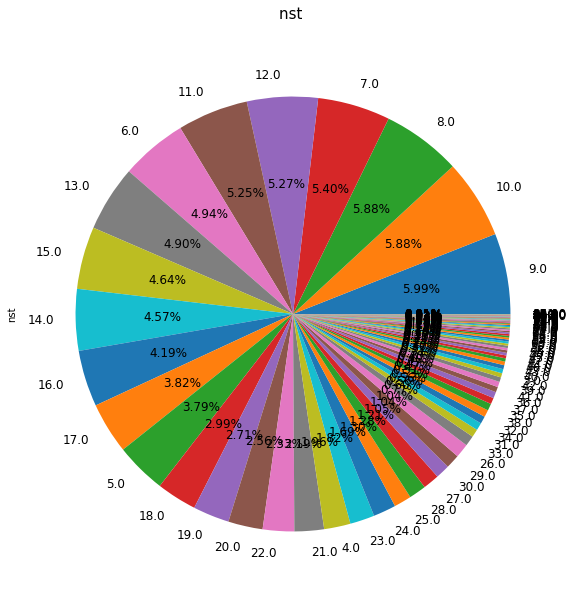

In [31]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'nst')

<AxesSubplot:>

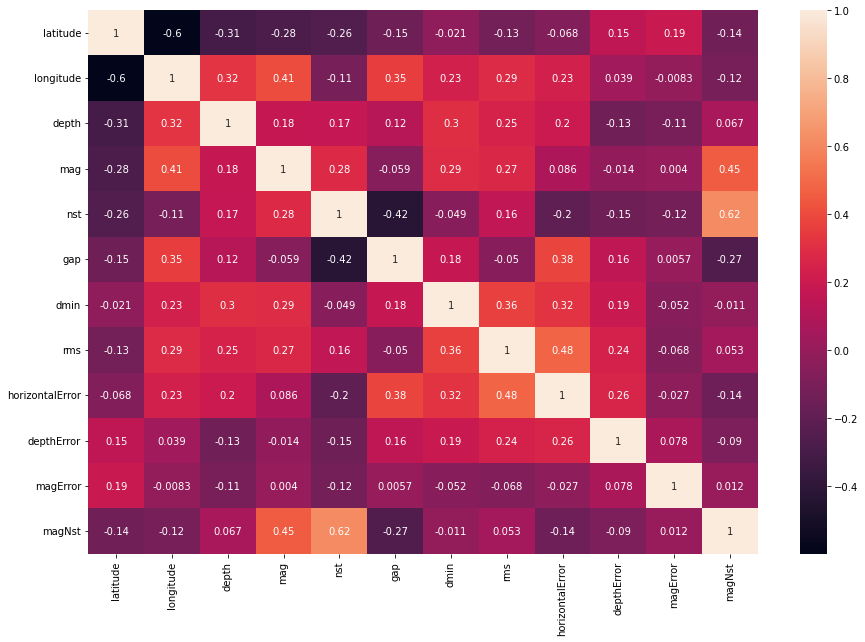

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
s.heatmap(df.corr(), ax=ax, annot=True)

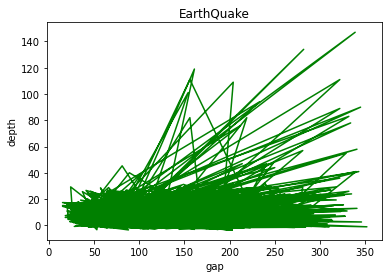

In [33]:
plt.plot(df["gap"], df["depth"], color='g')
plt.xlabel('gap')
plt.ylabel('depth')
plt.title('EarthQuake')
plt.show()

In [34]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [35]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='status', axis=1)
#Response variable
y = df.loc[:,'status']    

In [36]:
'''We'll use a test size of 14%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  6040
Number of test dataset:  984
Total number of dataset:  7024
